In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
from sklearn.ensemble import RandomForestClassifier

drop_list = ['index', 'country', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI7', 'TIPI8', 'TIPI9', 'Q18', 'Q19']

train = train.drop(drop_list, axis=1)
test = test.drop(drop_list, axis=1)

In [5]:
train_x = train.drop(['nerdiness'], axis=1)
train_y = train['nerdiness']

for i in train_x:
    replace = train_x.loc[:,i].value_counts().index[0]
    train_x[i] = train_x[i].fillna(replace)
    test[i] = test[i].fillna(replace)


rf = RandomForestClassifier(random_state=0)
rf.fit(train_x, train_y)

RandomForestClassifier(random_state=0)

In [6]:
pred = rf.predict(test)

In [7]:
submission = pd.read_csv('data/sample_submission.csv')
submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [8]:
submission['nerdiness'] = pred
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [9]:
submission.to_csv('randomforest.csv', index=False)

[('testelapse', 0.04529475215478938),
 ('Q6', 0.04517378312721958),
 ('surveyelapse', 0.04447117956479138),
 ('Q15', 0.040092832397319283),
 ('introelapse', 0.03772640109937687),
 ('Q2', 0.03659535517871049),
 ('age', 0.03614566600271704),
 ('Q1', 0.03422776563149528),
 ('Q4', 0.03307165428943734),
 ('Q11', 0.029223211619801764)]

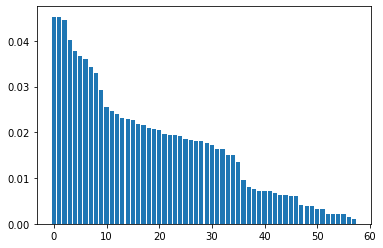

In [11]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(train_x.shape[1]), importances[indices])

feat_labels = train_x.columns.tolist()
feature = list(zip(feat_labels, rf.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]